In [32]:
#My project is dedicated to the behavior of the inchoative derivation in za- in imperative contexts.
#The problem comes from E.V. Paducheva's observation that imperative forms of imperfective verbs can get an inchoative meaning^
#(1) Иди домой!
#In (1), the speaker says that he wants the hearer to start the situation of going home, although the verb is imperfective and it
#can not denote a starting point in more mainstream contexts, as in past (2):
#(2)Когда я позвонил Пете, он шёл домой -> this can not mean that Petya started go home after the speaker's call
#Thus, imperatives can force inchoative interpertation, and it poses the question: will it affect the frequency of inchoatives in za-?
#For instance, in (3), the forms seem to be nearly synymous:
#(3) Кричи!/Закричи!
#I decided to check whether this concurence actually affects the frequency of the inchoatives in za-, in my statistical research project.
#To do so, I collected forms of different verbs which have inchoatives in za- occuring in imperative contexts. 
#I counted the frequency of forms in 4 contexts: PAST W|O INCHOATIVE (aka кричал(а,о,и)), PAST WITH INCHOATIVE (aka закричал(а, о, и)), 
#IMPERATIVE W|O INCHOATIVE (aka кричи(те)) and finally the key forms, IMRERATIVE WITH INCHOATIVE (aka закричи(те)).
#I will count chi-square test on it.

In [33]:
#I will repeat the part of my HW2 to download data.

In [34]:
import pandas as pd
import csv
import sqlite3

In [35]:
df = pd.read_csv('D:/za_stat.csv', sep=';', encoding='utf-8')


In [36]:
df.head()

,Verb,V_pst,za_V_pst,V_imp,za_V_imp
0,смеялcя,13303,14673,1212,40
1,плакал,14573,7386,2084,37
2,орал,3408,3917,461,4
3,интересовался,4234,2670,27,5
4,играл,28361,2439,1080,39


In [37]:
df1 = pd.read_csv('D:/za_classes.csv', sep=';', encoding='utf-8')

In [38]:
df1.head()

,Verbs,act,lex
0,смеялcя,EPa,HumManner
1,плакал,EPa,HumManner
2,орал,Epa,SoundSpeech
3,интересовался,ESGen,HumRel
4,играл,Epa,OtherHumActivity


In [39]:
con = sqlite3.connect("prefix_za.db")
cur = con.cursor()
df.to_sql(name='za_statistics', con=con, if_exists='replace')


In [40]:
con = sqlite3.connect("prefix_za.db")
cur = con.cursor()
df1.to_sql(name='za_classes', con=con, if_exists='replace')

In [41]:
for row in cur.execute('SELECT * FROM za_statistics'):
    print(row)

(0, 'смеялcя', 13303, 14673, 1212, 40)
(1, 'плакал', 14573, 7386, 2084, 37)
(2, 'орал', 3408, 3917, 461, 4)
(3, 'интересовался', 4234, 2670, 27, 5)
(4, 'играл', 28361, 2439, 1080, 39)
(5, 'интересовал', 4626, 2008, 0, 9)
(6, 'мёрз', 645, 1996, 16, 13)
(7, 'стонал', 2253, 1719, 38, 2)
(8, 'ревел', 1918, 1477, 181, 6)
(9, 'звучал', 8011, 1465, 18, 2)
(10, 'шумел', 3914, 1459, 508, 5)
(11, 'блестел', 4386, 1148, 9, 2)
(12, 'визжал', 1299, 1093, 19, 2)
(13, 'качался', 1800, 862, 23, 2)
(14, 'рычал', 816, 821, 68, 2)
(15, 'тряс', 1899, 700, 67, 4)
(16, 'бастовал', 216, 445, 10, 2)
(17, 'упрямился', 186, 277, 60, 2)
(18, 'артачился', 33, 155, 4, 2)


In [42]:
from scipy.stats import chisquare

In [43]:
x = 0
while x < len(df):
    print("Chisquare for " +df['Verb'].values[x])
    print(chisquare((df['V_pst'].values[x], df['za_V_pst'].values[x], df['V_imp'].values[x], df['za_V_imp'].values[x])))
    x = x+1



Chisquare for смеялcя
Power_divergenceResult(statistic=24656.94347885589, pvalue=0.0)
Chisquare for плакал
Power_divergenceResult(statistic=20981.420265780733, pvalue=0.0)
Chisquare for орал
Power_divergenceResult(statistic=6161.1630295250325, pvalue=0.0)
Chisquare for интересовался
Power_divergenceResult(statistic=7514.063437139561, pvalue=0.0)
Chisquare for играл
Power_divergenceResult(statistic=69771.27388076068, pvalue=0.0)
Chisquare for интересовал
Power_divergenceResult(statistic=8670.575794068945, pvalue=0.0)
Chisquare for мёрз
Power_divergenceResult(statistic=3922.458426966292, pvalue=0.0)
Chisquare for стонал
Power_divergenceResult(statistic=3996.3928215353935, pvalue=0.0)
Chisquare for ревел
Power_divergenceResult(statistic=2998.737018425461, pvalue=0.0)
Chisquare for звучал
Power_divergenceResult(statistic=18441.099410278013, pvalue=0.0)
Chisquare for шумел
Power_divergenceResult(statistic=6146.732585796806, pvalue=0.0)
Chisquare for блестел
Power_divergenceResult(statistic=

In [44]:
#As you can see, the null hypothesis is rejected, so the parameters are not independent and correlate.
#To understand the exact direction of correlation, let us have a look at another test -- logistic regression.


In [60]:
import statsmodels.api as sm
df2 = pd.read_csv('C:/pref_za_disaggregategy.csv', sep=';', encoding = "utf-8")
df2.head()
import statsmodels.formula.api as smf
mod = smf.glm('v_za ~ v_imp', family=sm.families.Binomial(), data=df2).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   v_za   No. Observations:               148656
Model:                            GLM   Df Residuals:                   148654
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90992.
Date:                Mon, 23 Nov 2020   Deviance:                   1.8198e+05
Time:                        23:57:08   Pearson chi2:                 1.49e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7191      0.006   -127.451      0.000      -0.730      -0.708
v_imp         -2.7681      0.076    -36.481      0.000      -2.917      -2.619
==============================================================================
"""

In [ ]:
#The correlation coefficients show the negative sign, and it means that the correlation is negative.
#It means that choice of imperative negatively influences on the choice of za-, which is what we expected.
#Now we can be sure our hypothesis is maintained by the statistics: there is indeed a negative correlation between imperative and za usages.

In [62]:
#The first query
cur.execute('SELECT Verb FROM za_statistics ORDER BY za_V_imp')
print(cur.fetchall())
#Here I filter the verbs with respect to the frequency of their inchoatives in za- in imperative forms.

[('стонал',), ('звучал',), ('блестел',), ('визжал',), ('качался',), ('рычал',), ('бастовал',), ('упрямился',), ('артачился',), ('орал',), ('тряс',), ('интересовался',), ('шумел',), ('ревел',), ('интересовал',), ('мёрз',), ('плакал',), ('играл',), ('смеялcя',)]


In [ ]:
#It is interesting why it is so. Possibly the most frequent verbs here are either agentive or denote some reactions one could ask to avoid.

In [ ]:
#The second query.
cur.execute('SELECT * FROM za_statistics INNER JOIN za_classes ON za_statistics.Verb = za_classes.Verbs')
#Here I join the tables together.  

In [63]:
#The third query
cur.execute("SELECT Verb from za_statistics ORDER BY za_V_imp LIMIT 19 OFFSET 14")
print(cur.fetchall())
#Here I filter out the most frequent verbs with za- in imperative (the last one is the most frequent)

[('интересовал',), ('мёрз',), ('плакал',), ('играл',), ('смеялcя',)]


In [64]:
#Let it also be a part of the third query
cur.execute("SELECT Verb from za_statistics ORDER BY za_V_imp LIMIT 5")
print(cur.fetchall())
#Here I filter out the least frequent verbs with za- in imperative (the first one is the least frequent)

[('стонал',), ('звучал',), ('блестел',), ('визжал',), ('качался',)]


In [65]:
#The fourth query -- and next one is also a part of the fourth query
cur.execute('SELECT Verb FROM za_statistics INNER JOIN za_classes ON za_statistics.Verb = za_classes.Verbs WHERE lex = "Sound" OR lex = "SoundSpeech" ORDER BY za_V_imp')
print(cur.fetchall())
#Here I filter out most frequent verbs of sound occured with za- in the imperative (the last one is the most frequent)

[('стонал',), ('звучал',), ('визжал',), ('рычал',), ('орал',), ('шумел',), ('ревел',)]


In [66]:
cur.execute('SELECT Verb FROM za_statistics INNER JOIN za_classes ON za_statistics.Verb = za_classes.Verbs WHERE lex = "Sound" OR lex = "SoundSpeech" ORDER BY V_imp')
print(cur.fetchall())
#Here I do the same for the imperative forms of the base predicates.Note that the is a difference: 
#реветь is the most frequent verb in za-imperatives, while it is practically the last verb in simple imperatives.
#I think this is explainable via the fact that if we talk about the beginning of an action, more agentive verbs should be more frequent. Here it works the same. 
#In usual imperative contexts, the situation could be different since we can say imperatives to cause to stop the action (like "Не рычи на меня!")

[('звучал',), ('визжал',), ('стонал',), ('рычал',), ('ревел',), ('орал',), ('шумел',)]


In [67]:
#The fifth query
cur.execute("SELECT Verb, (V_pst + V_imp + za_V_pst + za_V_imp) AS V_freq FROM za_statistics ORDER BY V_freq")
print(cur.fetchall())
#Here I filter verbs with respect to their whole frequency (including inchoatives)

[('артачился', 194), ('упрямился', 525), ('бастовал', 673), ('рычал', 1707), ('визжал', 2413), ('мёрз', 2670), ('тряс', 2670), ('качался', 2687), ('ревел', 3582), ('стонал', 4012), ('блестел', 5545), ('шумел', 5886), ('интересовал', 6643), ('интересовался', 6936), ('орал', 7790), ('звучал', 9496), ('плакал', 24080), ('смеялcя', 29228), ('играл', 31919)]


In [68]:
#The last, six query
cur.execute("SELECT AVG(za_V_pst) FROM za_statistics")
print(cur.fetchall())
#Here I find an average of the usages of za- in the past. It is strange, because in EXcel, there is another number.

[(2458.4210526315787,)]


In [80]:
#New seventh query.
cur.execute("SELECT SUM(za_V_imp) FROM za_statistics")
print(cur.fetchall())
#Here we get the sum of the whole set of imperatives in za.

[(180,)]


In [86]:
cur.execute("SELECT Verb, za_V_imp*100/180 FROM za_statistics")
print(cur.fetchall())
#Here we get the proportion of each verb in za- in imperative related to all za-imperatives.

[('смеялcя', 22), ('плакал', 20), ('орал', 2), ('интересовался', 2), ('играл', 21), ('интересовал', 5), ('мёрз', 7), ('стонал', 1), ('ревел', 3), ('звучал', 1), ('шумел', 2), ('блестел', 1), ('визжал', 1), ('качался', 1), ('рычал', 1), ('тряс', 2), ('бастовал', 1), ('упрямился', 1), ('артачился', 1)]


In [95]:
cur.execute("SELECT Verb, za_V_pst*100/(V_pst+za_V_pst) AS V_pr FROM za_statistics ORDER by V_pr")
print(cur.fetchall())
#Here I get the percentage of za-usage in the past forms for corresponding verbs. We can see that the most "inchoative-used" verb
#is заартачиться (and indeed, its inchoative variant seems to be more natural than bare артачиться)
#The next one is замёрз, which is also used in za- more often. It is probably pragmatically explained: situation when someone
#becomes frozen are more important when the situations when someone continues being frozen (they are more "mirative")
#Another verbs that have more than 50% usage of za- could be classified as signal-oriented verbs, so for them it is more important
#to catch the beginning of the action rather than its continuity.

[('играл', 7), ('звучал', 15), ('блестел', 20), ('тряс', 26), ('шумел', 27), ('интересовал', 30), ('качался', 32), ('плакал', 33), ('интересовался', 38), ('стонал', 43), ('ревел', 43), ('визжал', 45), ('рычал', 50), ('смеялcя', 52), ('орал', 53), ('упрямился', 59), ('бастовал', 67), ('мёрз', 75), ('артачился', 82)]


In [96]:
cur.execute("SELECT Verb, V_pst FROM za_statistics ORDER BY V_pst")
print(cur.fetchall())

[('артачился', 33), ('упрямился', 186), ('бастовал', 216), ('мёрз', 645), ('рычал', 816), ('визжал', 1299), ('качался', 1800), ('тряс', 1899), ('ревел', 1918), ('стонал', 2253), ('орал', 3408), ('шумел', 3914), ('интересовался', 4234), ('блестел', 4386), ('интересовал', 4626), ('звучал', 8011), ('смеялcя', 13303), ('плакал', 14573), ('играл', 28361)]


In [97]:
cur.execute("SELECT Verb, za_V_pst FROM za_statistics ORDER BY za_V_pst")
print(cur.fetchall())

[('артачился', 155), ('упрямился', 277), ('бастовал', 445), ('тряс', 700), ('рычал', 821), ('качался', 862), ('визжал', 1093), ('блестел', 1148), ('шумел', 1459), ('звучал', 1465), ('ревел', 1477), ('стонал', 1719), ('мёрз', 1996), ('интересовал', 2008), ('играл', 2439), ('интересовался', 2670), ('орал', 3917), ('плакал', 7386), ('смеялcя', 14673)]


In [ ]:
#If we have a look at verbs ranged by frequency in the bare past and in the za-past, we can see the influence of this disproportion.
#Although there are many similarities, it is well seen that top-verb in bare past, играть, is only the fifth in the za-past range.
#On the other hand, top-za-past verb смеяться is on the third place of bare-past verbs. Also мёрзнуть significantly changes its place
#from being on the sixteenth place in bare past to being on the seventh place in the za-past range.

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df2.head()

,v,v_imp,v_za,act,lex
0,"смеял(ся, ась, ось, ись)",0,0,EPa,HumManner
1,"смеял(ся, ась, ось, ись)",0,0,EPa,HumManner
2,"смеял(ся, ась, ось, ись)",0,0,EPa,HumManner
3,"смеял(ся, ась, ось, ись)",0,0,EPa,HumManner
4,"смеял(ся, ась, ось, ись)",0,0,EPa,HumManner


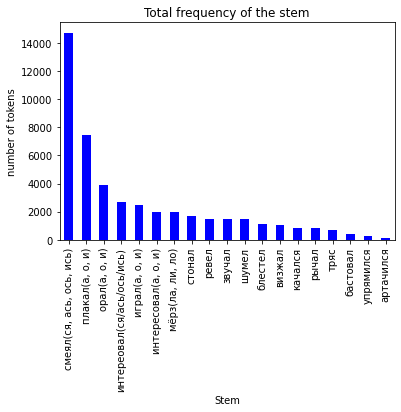

In [99]:
df2[df2['v_za'] == 1]['v'].value_counts().plot.bar(color='blue'); 
plt.title('Total frequency of the stem')
plt.xlabel('Stem')
plt.ylabel('number of tokens');
#This graph shows us how much usages with za- each stem has

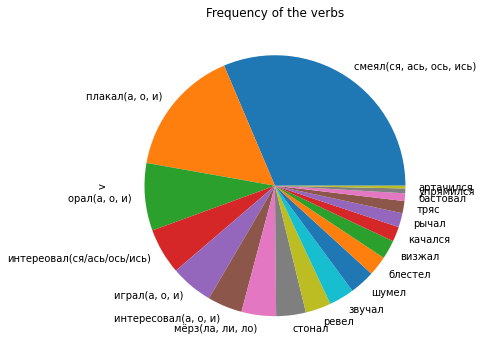

In [100]:
plt.figure(figsize=(6, 6))
df2[df2['v_za'] == 1]['v'].value_counts().plot(kind='pie');
plt.title('Frequency of the verbs');
#This graph shows the "portion" of usages of inchoative from a verb among all of the usages of the inchoatives in za-

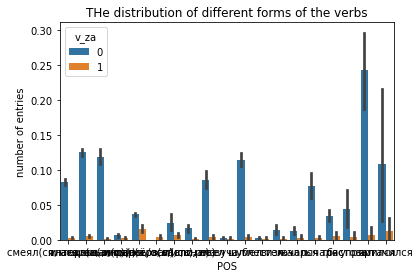

In [101]:
sns.barplot(x="v", y="v_imp", hue = "v_za", orientation=u'vertical', data=df2)
plt.title('THe distribution of different forms of the verbs')
plt.xlabel('POS')
plt.ylabel('number of entries');
#This graph shows the proportion of forms with za- and without za- for each verb.
#As far as I understood, blue lines in the colums are responsible for imperative parts.

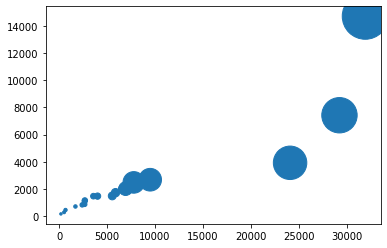

In [115]:
plt.scatter(df2['v'].value_counts(), df2[df2['v_za'] == 1]['v'].value_counts(), df2[df2['v_imp'] == 1]['v'].value_counts()) 
plt.show()